<a href="https://colab.research.google.com/github/ShreyashKumar07/XAI-Experiments-in-Health-Care-Industry/blob/main/alzheimers_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install pandas-summary
!pip install optuna
!pip install pycaret
!pip install --upgrade numpy scikit-learn pycaret

  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
from pycaret.classification import *

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alzheimers_disease_data.csv')
data

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0              13.297218          6.327112     1.347214  ...   
1               4.542524          7.619885     0.518767  ...   
2              19.555085          7.844988     1.826335  ...   
3              12.209266          8.428001     7.435604  ...   
4              18.454356          6.310461     0.795498  ...   
...                  ...               ...          ...  ...   
2144            1.561126          4.049964     6.555306  ...   
2145           18.767261          1.360667     2.904662  ...   
2146            4.594670          9.886002     8.120025  ...   
2147            8.674505          6.354282     1.263427  ...   
2148            7.890703          6.570993     7.941404  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
0                    0                   0  1.725883          0   
1                    0                   0  2.592424          0   
2                    0                   0  7.119548          0   
3                    0                   1  6.481226          0   
4                    0                   0  0.014691          0   
...                ...                 ...       ...        ...   
2144                 0                   0  4.492838          1   
2145                 0                   1  9.204952          0   
2146                 0                   0  5.036334          0   
2147                 0                   0  3.785399          0   
2148                 0                   1  8.327563          0   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0                  0                   0                          1   
1                  0                   0                          0   
2                  1                   0                          1   
3                  0                   0                          0   
4                  0                   1                          1   
...              ...                 ...                        ...   
2144               0                   0                          0   
2145               0                   0                          0   
2146               0                   0                          0   
2147               0                   0                          0   
2148               1                   0                          0   

      Forgetfulness  Diagnosis  DoctorInCharge  
0                 0          0       XXXConfid  
1                 1          0       XXXConfid  
2                 0          0       XXXConfid  
3                 0          0       XXXConfid  
4                 0          0       XXXConfid  
...             ...        ...             ...  
2144              0          1       XXXConfid  
2145              0          1       XXXConfid  
2146              0          1       XXXConfid  
2147              1          1       XXXConfid  
2148              1          0       XXXConfid  

[2149 rows x 35 columns]

# Dataset Description

In [34]:
data.shape

(2149, 35)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

PatientID	A unique identifier for each patient.

Age	The age of the patient in years.

Gender	The sex of the patient (e.g., Male or Female).

Ethnicity	The patient's ethnic background.

EducationLevel	The highest level of education attained by the patient.

BMI	Body Mass Index, a measure of body fat based on height and weight.

Smoking	Smoking status (e.g., Current Smoker, Former Smoker, Never Smoked).

AlcoholConsumption	Frequency or amount of alcohol consumed.

PhysicalActivity	Level of physical activity (e.g., sedentary, lightly active, active).

DietQuality	A measure of how healthy the patient's diet is (e.g., poor, fair, good, excellent).

SleepQuality	How well the patient sleeps (e.g., poor, fair, good, excellent).

FamilyHistoryAlzheimers	Whether or not the patient has a family history of Alzheimer's disease.

CardiovascularDisease	Whether or not the patient has a history of cardiovascular disease (e.g., heart disease, stroke).

Diabetes	Whether or not the patient has diabetes.

Depression	Whether or not the patient has a history of depression.

HeadInjury	Whether or not the patient has had a significant head injury in the past.

Hypertension	Whether or not the patient has hypertension (high blood pressure).

SystolicBP	Systolic blood pressure reading.

DiastolicBP	Diastolic blood pressure reading.

CholesterolTotal	Total cholesterol level in the blood.

CholesterolLDL	Low-density lipoprotein cholesterol level (often called "bad" cholesterol).

CholesterolHDL	High-density lipoprotein cholesterol level (often called "good" cholesterol).

CholesterolTriglycerides	Triglyceride level in the blood.

MMSE	Mini-Mental State Examination score, a test of cognitive function.
Lower scores indicate impairment.

FunctionalAssessment	An assessment of how well the patient can perform daily activities.

MemoryComplaints	Whether or not the patient reports memory problems.

BehavioralProblems	Whether or not the patient exhibits behavioral problems.

ADL	Activities of Daily Living, a measure of the patient's ability to perform basic self-care tasks.

Confusion	Whether or not the patient experiences confusion.

Disorientation	Whether or not the patient experiences disorientation.

PersonalityChanges	Whether or not the patient has experienced changes in personality.

DifficultyCompletingTasks	Whether or not the patient has difficulty completing everyday tasks.

Forgetfulness	Whether or not the patient experiences forgetfulness.

Diagnosis	The clinical diagnosis of the patient (e.g., Alzheimer's disease,
Mild Cognitive Impairment, Normal).

DoctorInCharge	The name or ID of the doctor responsible for the patient's care.

In [36]:
data.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

In [37]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
DoctorInCharge               0
dtype: int64

In [38]:
# Drop the Patient ID and DoctorInCharge
data = data.drop(['PatientID','DoctorInCharge'],axis=1)

Performing Cramer's V and Chi-Squared Test for find out the influence of Independent categorical variables on 'Diagnosis'

Cramer's V for Gender: 0.0
Chi-squared test for Gender: chi2 = 0.8597155201269622, p-value = 0.35381831348465786
Cramer's V for Ethnicity: 0.03919994024994505
Chi-squared test for Ethnicity: chi2 = 6.302088590572339, p-value = 0.09780307184026778
Cramer's V for EducationLevel: 0.02599733942292459
Chi-squared test for EducationLevel: chi2 = 4.453147172785708, p-value = 0.21650771973324673
Cramer's V for Smoking: 0.0
Chi-squared test for Smoking: chi2 = 0.030886776214044256, p-value = 0.860493227376371
Cramer's V for AlcoholConsumption: nan
Chi-squared test for AlcoholConsumption: chi2 = 2149.0, p-value = 0.4898576962191864
Cramer's V for PhysicalActivity: nan
Chi-squared test for PhysicalActivity: chi2 = 2149.0, p-value = 0.4898576962191864
Cramer's V for DietQuality: nan
Chi-squared test for DietQuality: chi2 = 2149.0, p-value = 0.4898576962191864
Cramer's V for SleepQuality: nan
Chi-squared test for SleepQuality: chi2 = 2149.0, p-value = 0.4898576962191864
Cramer's V for FamilyHistory

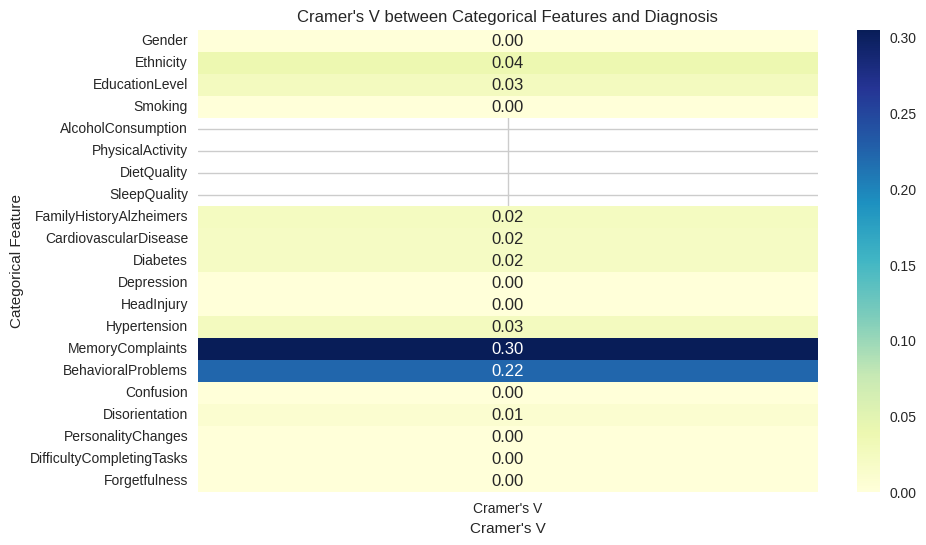

In [40]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    # Get the total sum of elements in the contingency table
    n = confusion_matrix.sum().sum() # Modified Line: Get total sum instead of Series
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption',
                    'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

cramers_results = {}
chi2_results = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    cramers_v_value = cramers_v(contingency_table)

    cramers_results[col] = cramers_v_value
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

    print(f"Cramer's V for {col}: {cramers_v_value}")
    print(f"Chi-squared test for {col}: chi2 = {chi2}, p-value = {p}")

# Create heatmap
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramer\'s V'])
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cramer's V between Categorical Features and Diagnosis")
plt.xlabel("Cramer's V")
plt.ylabel("Categorical Feature")
plt.show()

In [41]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    print(f"Feature vs Diagnosis: {col} vs. Diagnosis")
    print(f"  Chi2 Statistic: {chi2_results[col]['chi2']:.3f}")
    print(f"  P-value: {chi2_results[col]['p-value']:.3f}")
    print(f"  Cramer's V: {cramers_results[col]:.3f}")
    print("-" * 20)

Feature vs Diagnosis: Gender vs. Diagnosis
  Chi2 Statistic: 0.860
  P-value: 0.354
  Cramer's V: 0.000
--------------------
Feature vs Diagnosis: Ethnicity vs. Diagnosis
  Chi2 Statistic: 6.302
  P-value: 0.098
  Cramer's V: 0.039
--------------------
Feature vs Diagnosis: EducationLevel vs. Diagnosis
  Chi2 Statistic: 4.453
  P-value: 0.217
  Cramer's V: 0.026
--------------------
Feature vs Diagnosis: Smoking vs. Diagnosis
  Chi2 Statistic: 0.031
  P-value: 0.860
  Cramer's V: 0.000
--------------------
Feature vs Diagnosis: AlcoholConsumption vs. Diagnosis
  Chi2 Statistic: 2149.000
  P-value: 0.490
  Cramer's V: nan
--------------------
Feature vs Diagnosis: PhysicalActivity vs. Diagnosis
  Chi2 Statistic: 2149.000
  P-value: 0.490
  Cramer's V: nan
--------------------
Feature vs Diagnosis: DietQuality vs. Diagnosis
  Chi2 Statistic: 2149.000
  P-value: 0.490
  Cramer's V: nan
--------------------
Feature vs Diagnosis: SleepQuality vs. Diagnosis
  Chi2 Statistic: 2149.000
  P-val

Outliers Handling

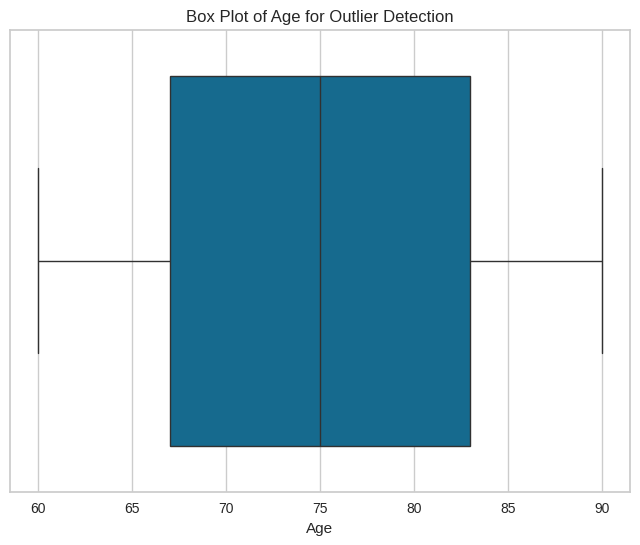

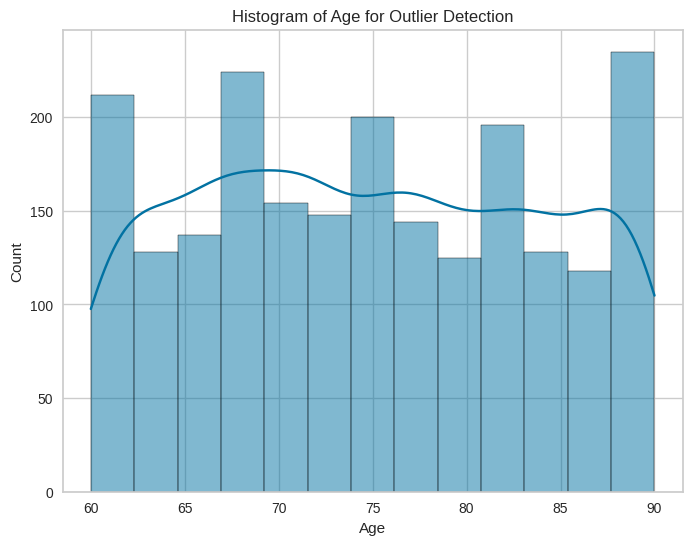

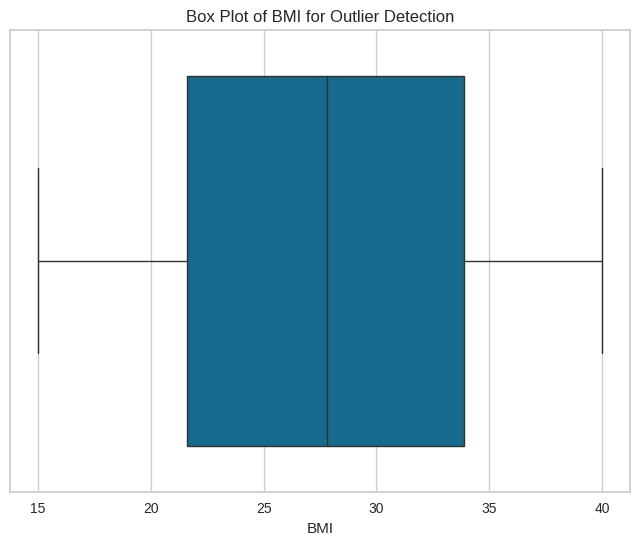

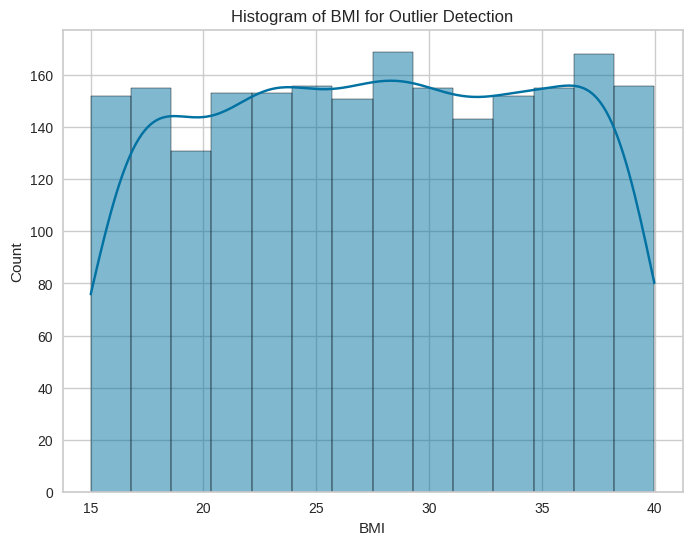

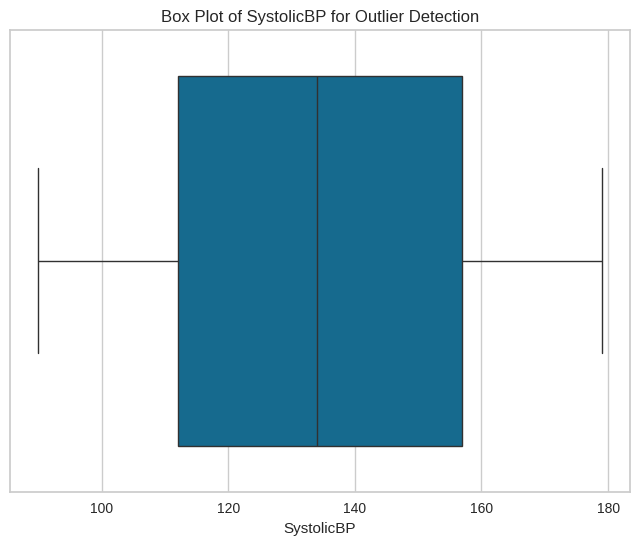

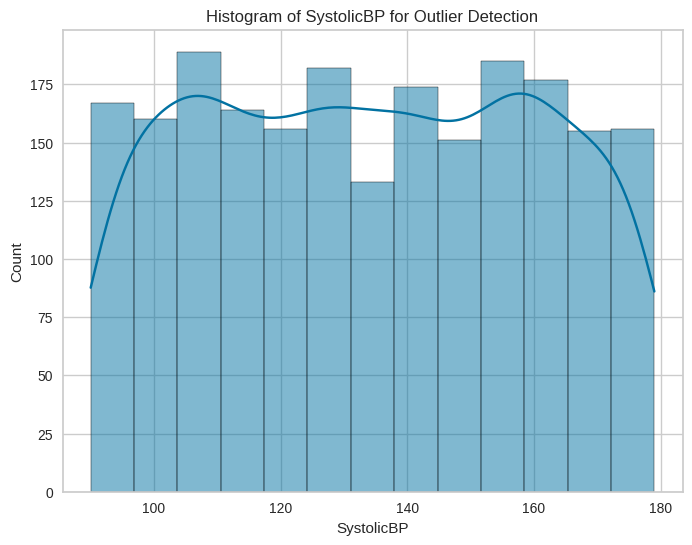

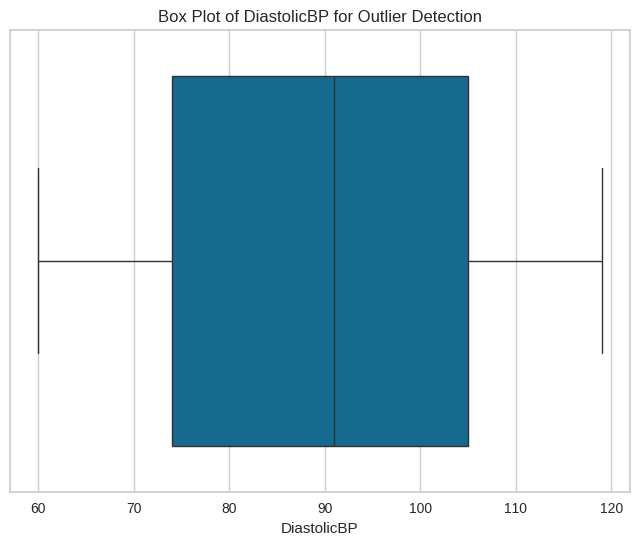

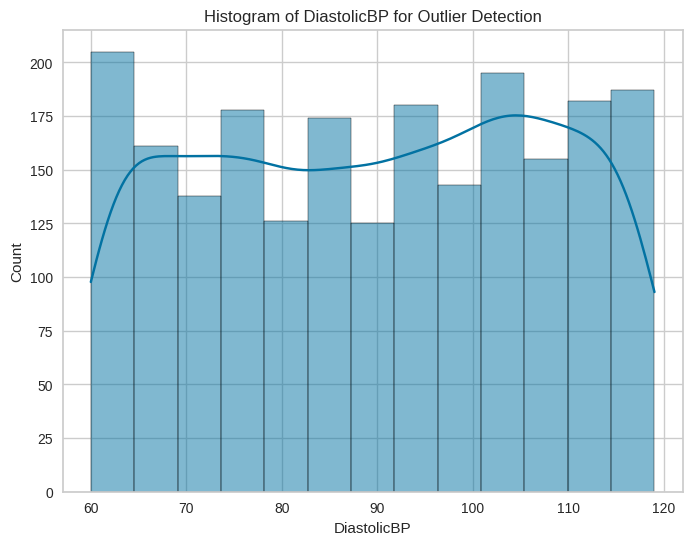

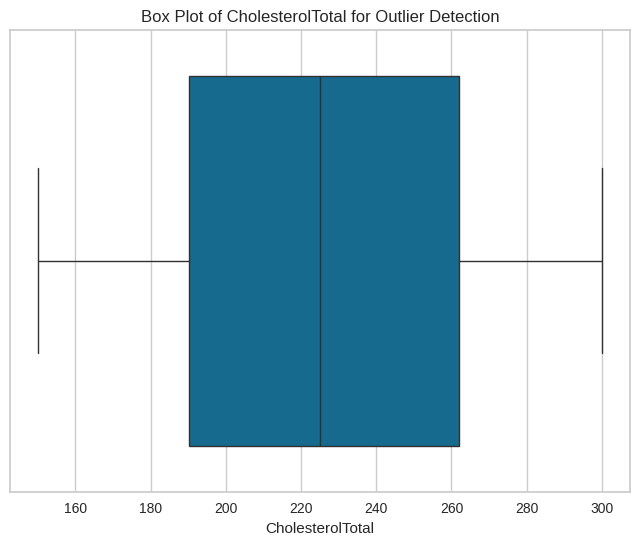

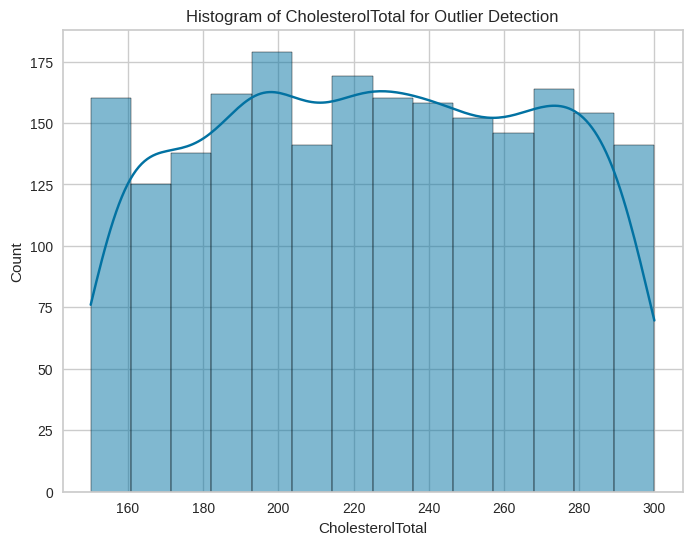

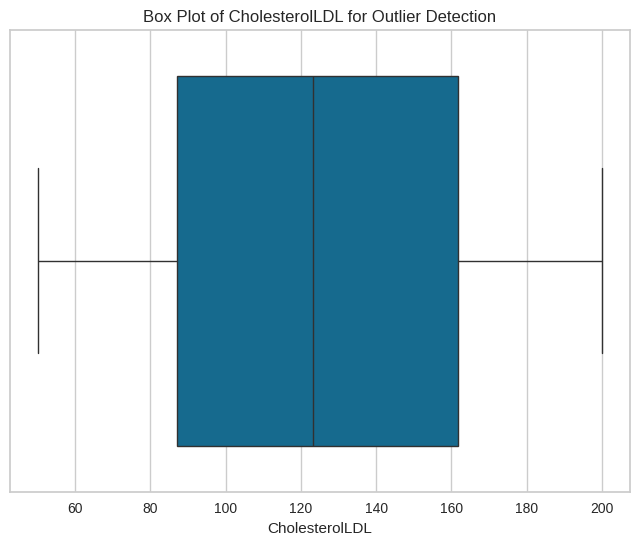

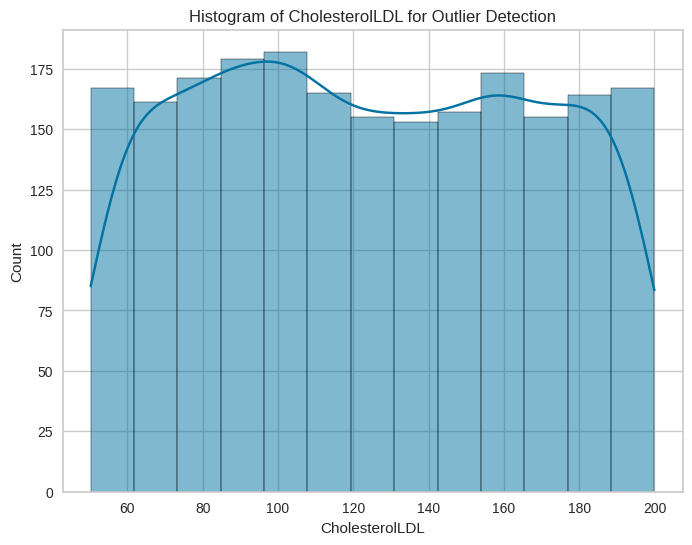

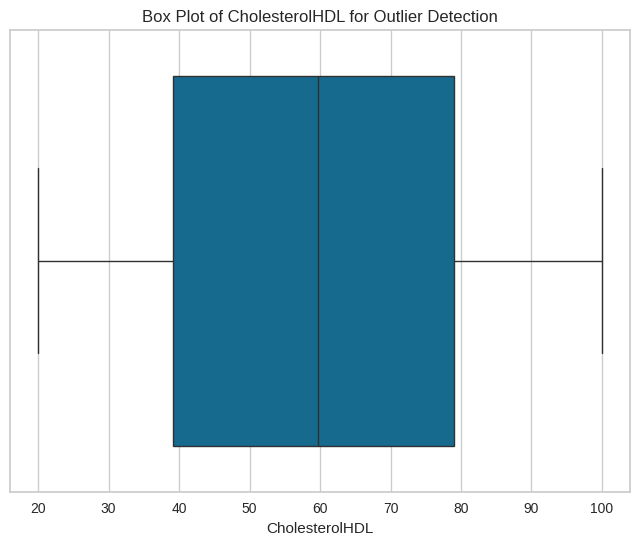

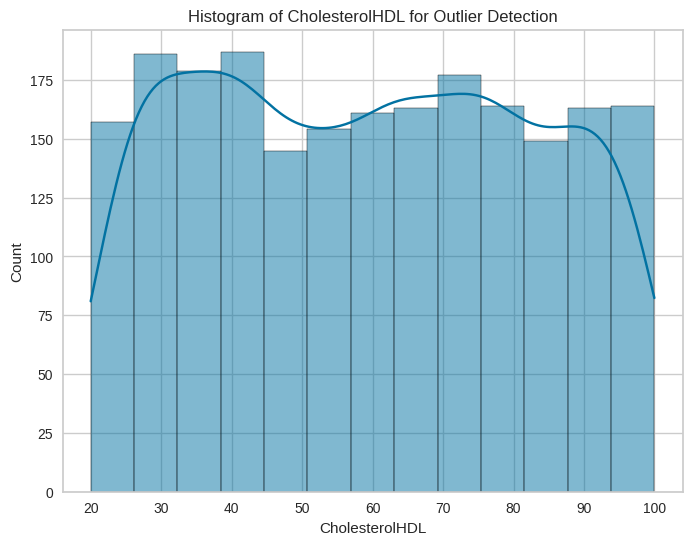

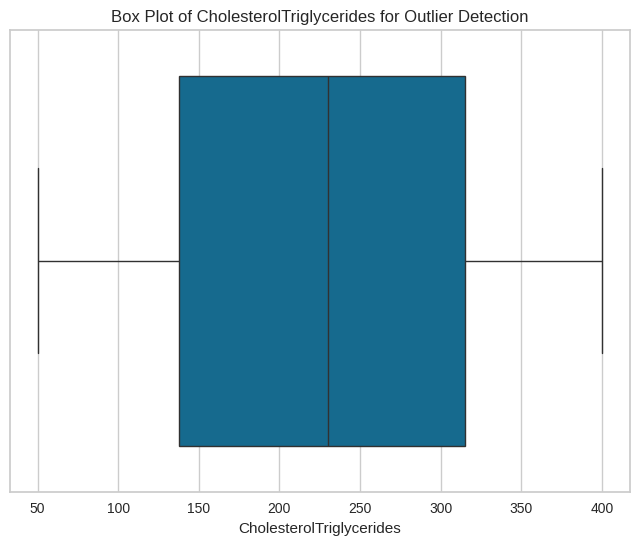

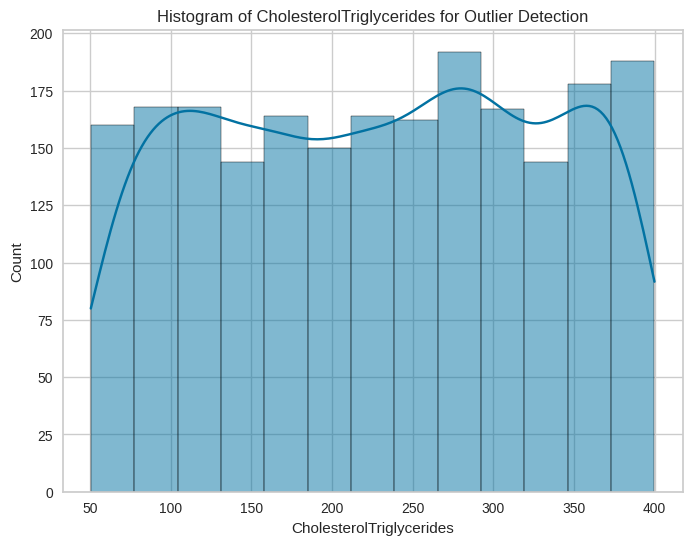

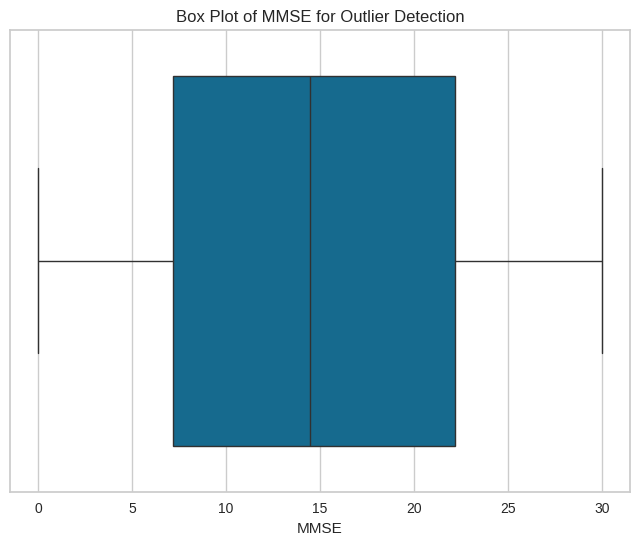

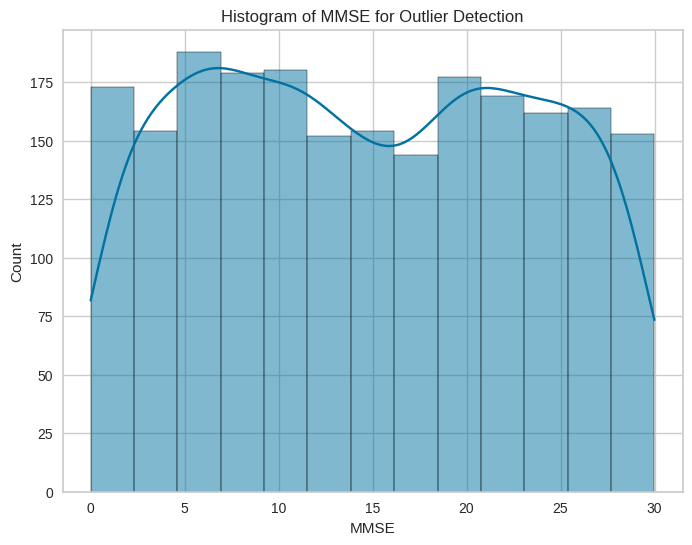

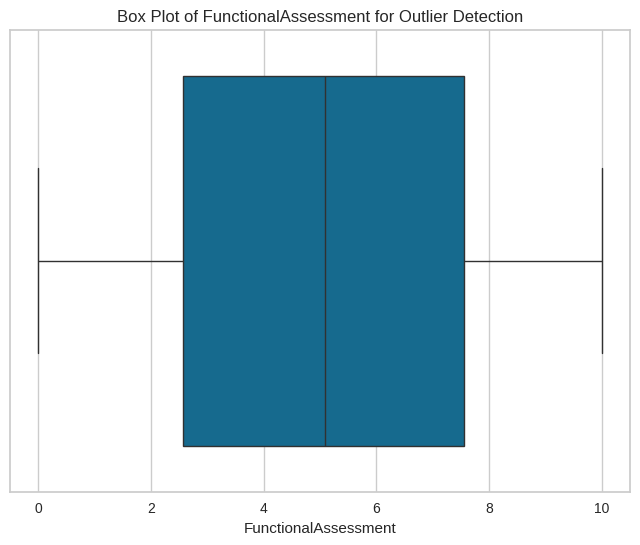

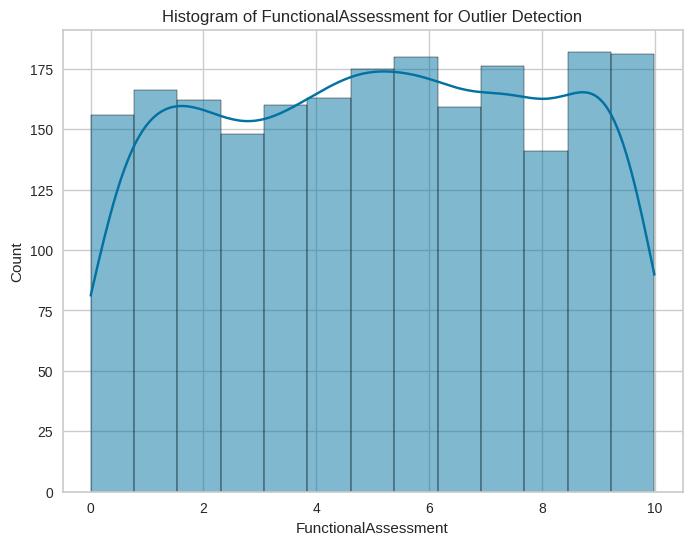

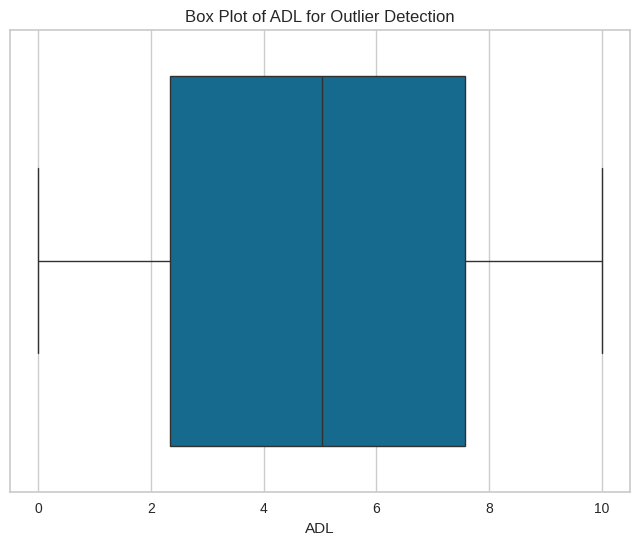

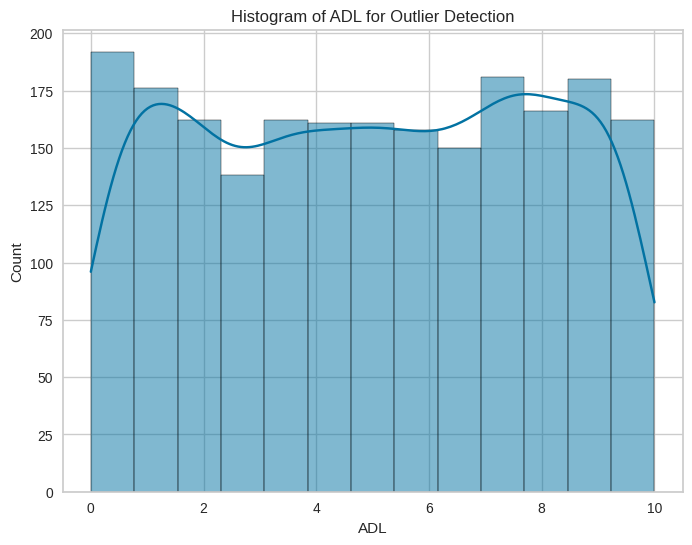

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed as in the provided code.

# List of columns to check for outliers (excluding 'Diagnosis')
numerical_cols = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                  'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Detect and visualize outliers for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col} for Outlier Detection')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col} for Outlier Detection')
    plt.show()

In [47]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Apply IQR method to each numerical column
for col in numerical_cols:
    data = remove_outliers_iqr(data, col)

print(data.shape)

(2149, 33)


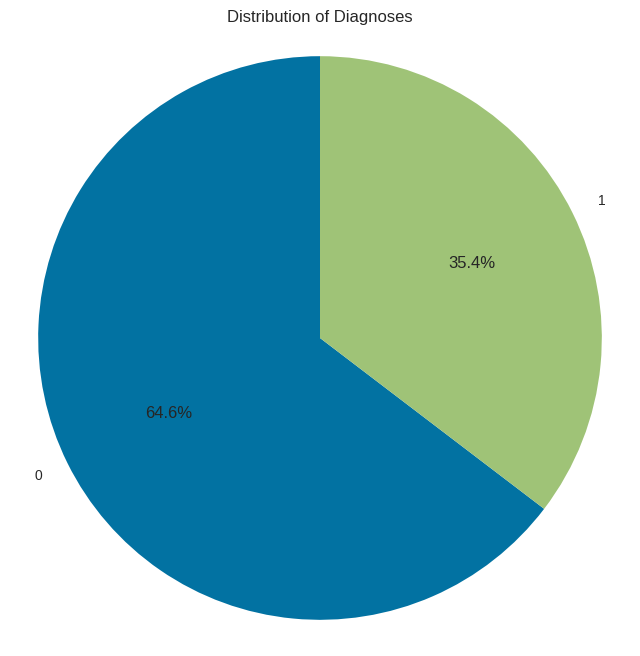

In [49]:
import matplotlib.pyplot as plt

# Calculate the distribution of diagnoses
diagnosis_counts = data['Diagnosis'].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnoses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
exclude_cols = ['Age', 'Gender', 'Diagnosis']

cols_to_scale = [col for col in data.columns if col not in exclude_cols]

scaler = StandardScaler()
# Fit and transform the selected columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [52]:
data

Age  Gender  Ethnicity  EducationLevel       BMI   Smoking  \
0      73       0  -0.700408        0.788833 -0.655225 -0.636784   
1      89       0  -0.700408       -1.422782 -0.114751 -0.636784   
2      73       0   2.311955       -0.316974 -1.366428 -0.636784   
3      74       1  -0.700408       -0.316974  0.851625  1.570391   
4      89       0  -0.700408       -1.422782 -0.961607 -0.636784   
...   ...     ...        ...             ...       ...       ...   
2144   61       0  -0.700408       -0.316974  1.589030 -0.636784   
2145   75       0  -0.700408        0.788833 -1.357833 -0.636784   
2146   77       0  -0.700408       -0.316974 -1.687864 -0.636784   
2147   78       1   2.311955       -0.316974 -1.712334 -0.636784   
2148   72       0  -0.700408        0.788833  0.780797 -0.636784   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0               0.565923          0.492525    -1.253593      1.119918  ...   
1              -0.954895          0.945093    -1.538442      0.056836  ...   
2               1.653006          1.023896    -1.088855      1.487380  ...   
3               0.376930          1.227995     0.839804      0.760833  ...   
4               1.461793          0.486696    -1.443293     -0.824566  ...   
...                  ...               ...          ...           ...  ...   
2144           -1.472807         -0.304649     0.537127      0.274767  ...   
2145            1.516149         -1.246106    -0.718090      0.853112  ...   
2146           -0.945836          1.738405     1.075131     -0.726886  ...   
2147           -0.237109          0.502036    -1.282402      0.721313  ...   
2148           -0.373267          0.577902     1.013715      1.603726  ...   

      FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0                 0.497506         -0.512477           -0.431257 -1.104434   
1                 0.704907         -0.512477           -0.431257 -0.810601   
2                 0.281813         -0.512477           -0.431257  0.724491   
3                 1.343346         -0.512477            2.318805  0.508044   
4                 0.333665         -0.512477           -0.431257 -1.684679   
...                    ...               ...                 ...       ...   
2144             -1.674022         -0.512477           -0.431257 -0.166194   
2145              1.247350         -0.512477            2.318805  1.431627   
2146             -1.074634         -0.512477           -0.431257  0.018099   
2147              0.032446         -0.512477           -0.431257 -0.406078   
2148              0.424432         -0.512477            2.318805  1.134115   

      Confusion  Disorientation  PersonalityChanges  \
0     -0.508131       -0.433531           -0.421348   
1     -0.508131       -0.433531           -0.421348   
2     -0.508131        2.306640           -0.421348   
3     -0.508131       -0.433531           -0.421348   
4     -0.508131       -0.433531            2.373334   
...         ...             ...                 ...   
2144   1.967998       -0.433531           -0.421348   
2145  -0.508131       -0.433531           -0.421348   
2146  -0.508131       -0.433531           -0.421348   
2147  -0.508131       -0.433531           -0.421348   
2148  -0.508131        2.306640           -0.421348   

      DifficultyCompletingTasks  Forgetfulness  Diagnosis  
0                      2.302619      -0.657048          0  
1                     -0.434288       1.521959          0  
2                      2.302619      -0.657048          0  
3                     -0.434288      -0.657048          0  
4                      2.302619      -0.657048          0  
...                         ...            ...        ...  
2144                  -0.434288      -0.657048          1  
2145                  -0.434288      -0.657048          1  
2146                  -0.434288      -0.657048          1  
2147                  -0.434288       1.521959        

In [54]:
from pycaret.classification import *

# Setup PyCaret environment
clf = setup(data = data,
            target = 'Diagnosis',
            session_id = 42,
            preprocess = True,
            normalize = True,
            transformation = True,
            index = False,
            verbose = True)

In [55]:
print('Comparing models for alzheimers data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(sort='Accuracy', n_select=5)

Comparing models for alzheimers data and selecting top 5 out of them based on accuracy score


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [56]:
print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
CatBoostClassifier
XGBClassifier
LGBMClassifier
GradientBoostingClassifier
RandomForestClassifier


In [59]:
blender = blend_models(estimator_list=top_model, method='soft')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [61]:
# Evaluate the blended model
print(blender)
evaluate_model(blender)

VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7ef8783935b0>),
                             ('Extreme Gradient Boosting',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                                     criterion='gini',
                                                     max_depth=None,
                                              

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:
# Finalize the model
final_blender = finalize_model(blender)
final_blender

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Gender', 'Ethnicity',
                                             'EducationLevel', 'BMI', 'Smoking',
                                             'AlcoholConsumption',
                                             'PhysicalActivity', 'DietQuality',
                                             'SleepQuality',
                                             'FamilyHistoryAlzheimers',
                                             'CardiovascularDisease',
                                             'Diabetes', 'Depression',
                                             'HeadInjury', 'Hypertension',
                                             'SystolicBP'...
                                                                      max_features='sqrt',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_samples_leaf=1,
                                                                      min_samples_split=2,
                                                                      min_weight_fraction_leaf=0.0,
                                                                      monotonic_cst=None,
                                                                      n_estimators=100,
                                                                      n_jobs=-1,
                                                                      oob_score=False,
                                                                      random_state=42,
                                                                      verbose=0,
                                                                      warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

## Implementing SHAP XAI Shapley Additive exPlanations

In [64]:
!pip install shap
import shap

In [65]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(final_blender.predict, X_train)
shap_values = explainer(X_test) # Use explainer(X_test) or explainer.shap_values(X_test)
# OR
# shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 431it [08:37,  1.21s/it]


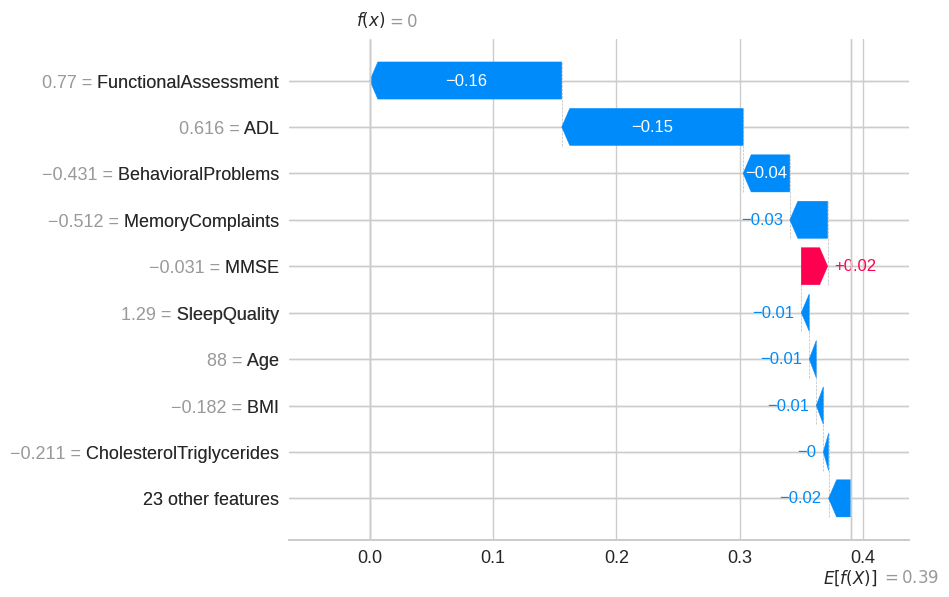

In [69]:
# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

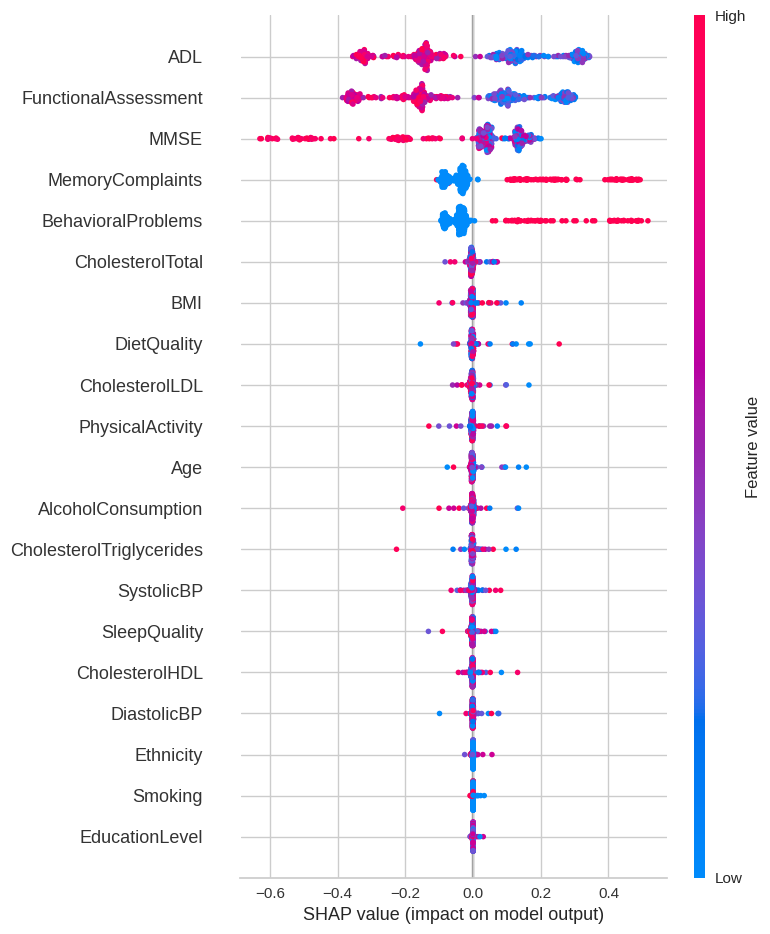

In [70]:
# Visualize the SHAP values for all features
shap.summary_plot(shap_values, X_test)

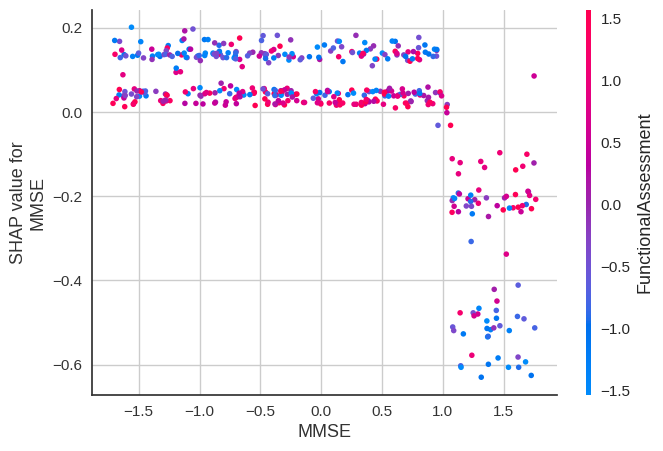

In [72]:
# Visualize the SHAP values for a specific feature
shap.dependence_plot("MMSE", shap_values.values, X_test)

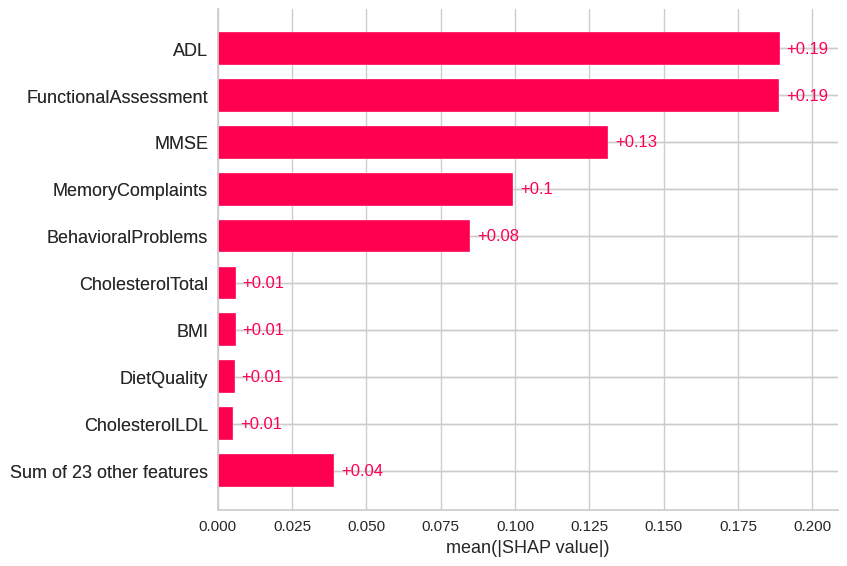

In [73]:
shap.plots.bar(shap_values)

## LIME Local  Interpretable Model-agnostic Explanations

In [74]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=82e8faefd77e3e834656e6e79a37421ecf015d7de9ba9e10cc59b39c869077bf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [78]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['MMSE', 'ADL'], # Class names
    mode='regression'
)

In [79]:
# Choose an instance to explain
instance_index = 8 # Example: explain the first instance
instance = X.iloc[instance_index]

In [80]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: final_blender.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=10
)

In [81]:
explanation.show_in_notebook(show_table=True)

In [82]:
explanation.as_list()

[('MMSE > 0.86', 0.5248478171552494),
 ('0.00 < FunctionalAssessment <= 0.85', 0.10878416020996586),
 ('ADL <= -0.90', -0.08859537577720517),
 ('MemoryComplaints <= -0.51', 0.06953638209190693),
 ('EducationLevel <= -0.32', 0.010428436917083533),
 ('PhysicalActivity <= -0.82', 0.008822532782965596),
 ('Hypertension > -0.42', -0.00775463487224276),
 ('Confusion <= -0.51', 0.007666608604004995),
 ('-0.89 < CholesterolTriglycerides <= 0.02', 0.00715438329685026),
 ('CardiovascularDisease <= -0.41', 0.006787551414853076)]

Trying with different ensemble learning methods

In [83]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [84]:
# Define base models
base_models = [
    ('lgbm', LGBMClassifier()),
    ('xgb', XGBClassifier()),
    ('catboost', CatBoostClassifier(verbose=0)),  # Set verbose to 0 to suppress output
    ('gb', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier())
]

In [85]:
# Boosting
boosting_model = GradientBoostingClassifier()
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

In [87]:
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier

# Bagging (using XGBClassifier as the base estimator)
bagging_model = BaggingClassifier(estimator=XGBClassifier(verbose=0))
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

In [88]:
# Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387
[LightGBM] [Info] Number of positive: 486, number of negative: 889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353455 -> initscore=-0.603889
[LightGBM] 

In [89]:
# Voting
voting_model = VotingClassifier(estimators=base_models, voting='soft')
voting_model.fit(X_train, y_train)
voting_predictions = voting_model.predict(X_test)

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3298
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387


In [90]:
# Evaluate the models (example using accuracy)
print("Boosting Accuracy:", accuracy_score(y_test, boosting_predictions))
print("Bagging Accuracy:", accuracy_score(y_test, bagging_predictions))
print("Stacking Accuracy:", accuracy_score(y_test, stacking_predictions))
print("Voting Accuracy:", accuracy_score(y_test, voting_predictions))

Boosting Accuracy: 0.958139534883721
Bagging Accuracy: 0.958139534883721
Stacking Accuracy: 0.958139534883721
Voting Accuracy: 0.9604651162790697


In [91]:
best_model = voting_model

PermutationExplainer explainer: 431it [06:34,  1.07it/s]


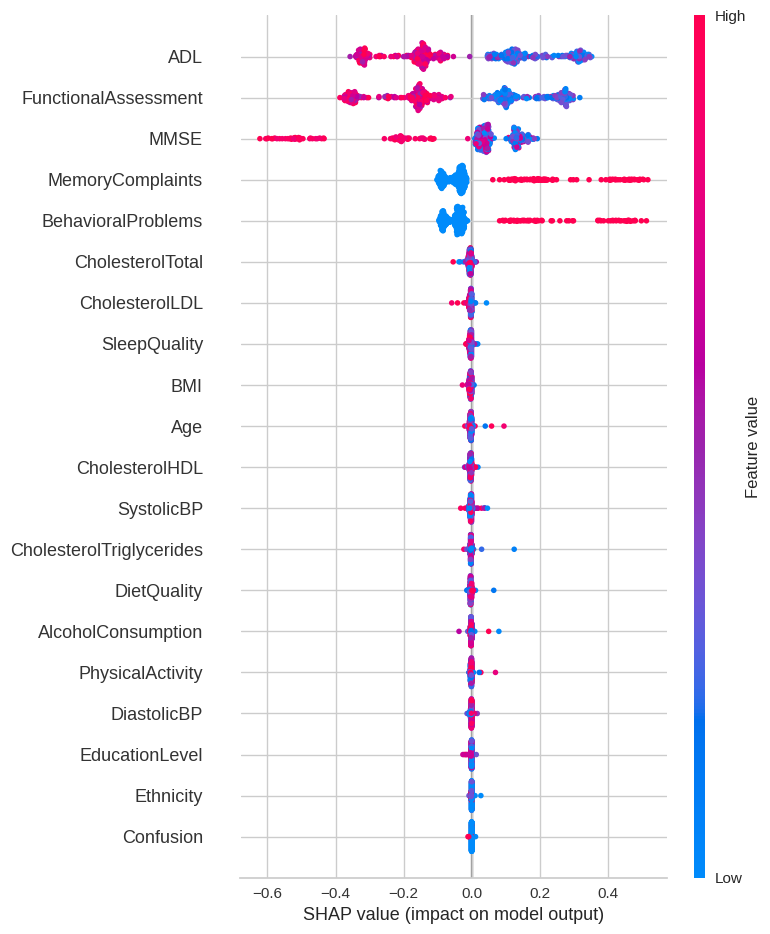

In [92]:
# SHAP Explanations for the best model
explainer = shap.Explainer(best_model.predict, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [93]:
# LIME Explanations for the best model
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['MMSE','ADL'],
    mode='classification'
)

# Example explanation for a single instance
i =1
explanation = explainer.explain_instance(X_test.iloc[i], best_model.predict_proba, num_features=10)
explanation.show_in_notebook()